### Importing the necessary packages

In [98]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from linearmodels import PanelOLS
import statsmodels.api as sm

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import MaxNLocator, FuncFormatter

### Reading in the data

In [100]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/final.csv')

In [101]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1,inplace = True) 

### Creating dummy variables and renaming the columns

In [104]:
df = pd.get_dummies(df, columns=['AGE'])

In [105]:
df.rename(columns = {'AGE_15 to 19':'fifteen_nineteen','AGE_20 to 24':'twnty_twntyfour','AGE_25 to 29':'twntyfiv_twntynine','AGE_35 to 39':'thrtyfiv_thrtynine'}, inplace = True)

In [107]:
df.columns

Index(['measure', 'STATE', 'cause', 'metric', 'YEAR', 'DEATH_RTE', 'LESS_HS',
       'HS', 'SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT',
       'PRC_HISP', 'PRC_OTHER', 'fifteen_nineteen', 'twnty_twntyfour',
       'twntyfiv_twntynine', 'thrtyfiv_thrtynine'],
      dtype='object')

### The baseline model



In [106]:
f = 'DEATH_RTE~YEAR+LESS_HS+HS+SOM_COL+RTE_CHL+RTE_GON+PRC_BLK+PRC_WHT+PRC_HISP+fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine'
model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     84.15
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          7.31e-148
Time:                        20:11:47   Log-Likelihood:                -4598.2
No. Observations:                1158   AIC:                             9222.
Df Residuals:                    1145   BIC:                             9288.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            354.1880    208

### Looping through our features 

Here I test our dependent variable against each of our features

In [18]:
features = ['LESS_HS','HS', 'SOM_COL', 'COL_PLUS', 'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT','PRC_HISP', 'PRC_OTHER']

In [47]:
for feature in features:
    f = 'DEATH_RTE~fifteen_nineteen+twnty_twntyfour+twntyfiv_twntynine+thrtyfiv_thrtynine+'+feature
    model = ols(formula=f, data=df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     159.0
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          2.25e-108
Time:                        15:20:27   Log-Likelihood:                -4710.0
No. Observations:                1158   AIC:                             9430.
Df Residuals:                    1153   BIC:                             9455.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.9168      1

                            OLS Regression Results                            
Dep. Variable:              DEATH_RTE   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     182.8
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          2.39e-121
Time:                        15:20:28   Log-Likelihood:                -4679.9
No. Observations:                1158   AIC:                             9370.
Df Residuals:                    1153   BIC:                             9395.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.6804      1

**Trying Fixed Effects Model**

In [ ]:
#convert year to datetime
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
#add column year to index
df=df.set_index('YEAR', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)

In [21]:
for feature in features:
    model_fe = PanelOLS(df.DEATH_RTE, df[[feature]], entity_effects = True)
    fe_res = model_fe.fit()
    print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.2061
Estimator:                   PanelOLS   R-squared (Between):             -1.7204
No. Observations:                1158   R-squared (Within):               0.2061
Date:                Tue, Feb 16 2021   R-squared (Overall):             -1.0748
Time:                        14:27:20   Log-likelihood                   -4826.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      297.58
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                  F(1,1146)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             297.58
                            

                          PanelOLS Estimation Summary                           
Dep. Variable:              DEATH_RTE   R-squared:                        0.1269
Estimator:                   PanelOLS   R-squared (Between):             -1.1740
No. Observations:                1158   R-squared (Within):               0.1269
Date:                Tue, Feb 16 2021   R-squared (Overall):             -0.7384
Time:                        14:27:21   Log-likelihood                   -4881.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      166.53
Entities:                          11   P-value                           0.0000
Avg Obs:                       105.27   Distribution:                  F(1,1146)
Min Obs:                       101.00                                           
Max Obs:                       111.00   F-statistic (robust):             166.53
                            

In [48]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [52]:
df = pd.read_csv('/Users/alexandrabruno/Documents/flatiron/data/final.csv')

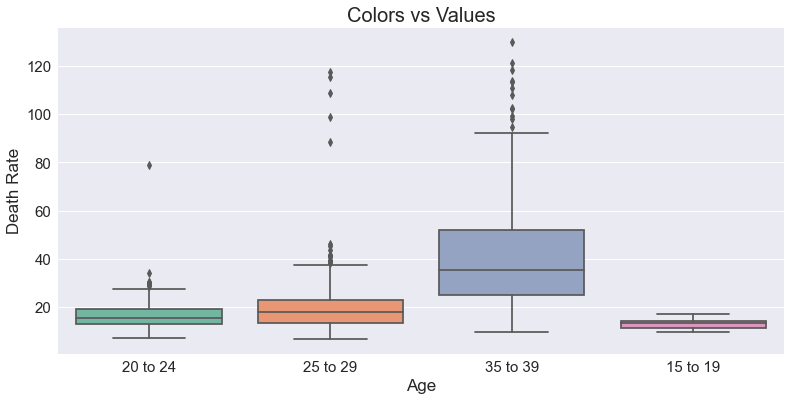

In [92]:
plt.figure(figsize=(13, 6))
fig = sns.boxplot(x=df["AGE"], y=df["DEATH_RTE"], data=df,palette="Set2").set_title('Age')
plt.xlabel("Age",fontsize=17)
plt.ylabel("Death Rate",fontsize=17)
plt.title("Colors vs Values",fontsize = 20) # You can comment this line out if you don't need title
plt.tick_params(labelsize=15)
plt.show(fig)

In [86]:
df.columns

Index(['Unnamed: 0', 'measure', 'STATE', 'AGE', 'cause', 'metric', 'YEAR',
       'DEATH_RTE', 'Unnamed: 0.1', 'LESS_HS', 'HS', 'SOM_COL', 'COL_PLUS',
       'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT', 'PRC_HISP', 'PRC_OTHER'],
      dtype='object')

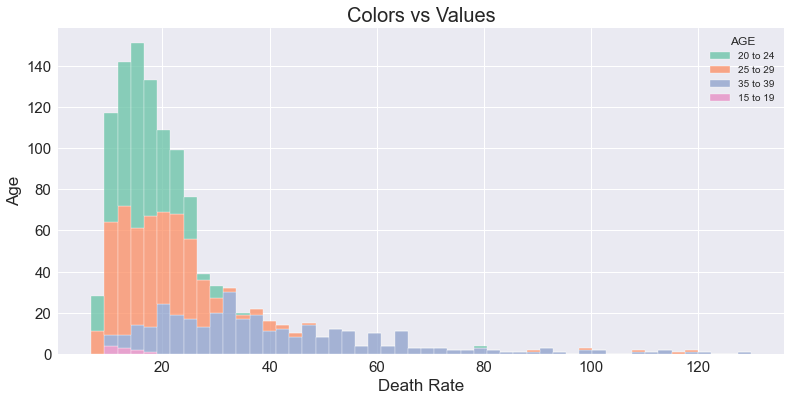

In [95]:
plt.figure(figsize=(13, 6))
fig = sns.histplot(data=df, x="DEATH_RTE", hue="AGE",multiple="stack",palette="Set2")
plt.xlabel("Death Rate",fontsize=17)
plt.ylabel("Age",fontsize=17)
plt.title("Colors vs Values",fontsize = 20) # You can comment this line out if you don't need title
plt.tick_params(labelsize=15)
plt.show(fig)

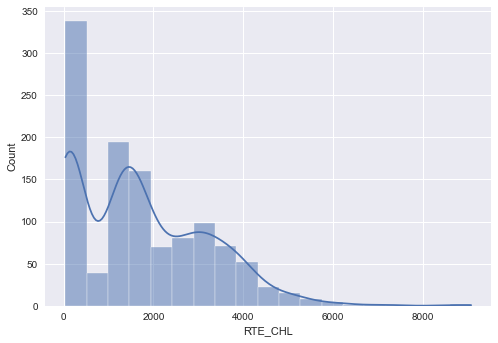

In [90]:
sns.histplot(data=df, x="RTE_CHL", kde=True)

In [96]:
df.columns

Index(['Unnamed: 0', 'measure', 'STATE', 'AGE', 'cause', 'metric', 'YEAR',
       'DEATH_RTE', 'Unnamed: 0.1', 'LESS_HS', 'HS', 'SOM_COL', 'COL_PLUS',
       'RTE_CHL', 'RTE_GON', 'PRC_BLK', 'PRC_WHT', 'PRC_HISP', 'PRC_OTHER'],
      dtype='object')